## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [1]:
## Reservado para a importação de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import sample

1. Abra a base de dados em questão

In [2]:
dataset = pd.read_csv('../dataset/covtype.csv')

2. Elimine todas as colunas relativas aos atributos categóricos

In [3]:
dados = dataset

for i in range(40):
    dados = dados.drop(columns=[f'Soil_Type{i+1}'])

for i in range(4):
    dados = dados.drop(columns=[f'Wilderness_Area{i+1}'])


In [4]:
dados.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [5]:
x = dados.drop("Cover_Type", axis = 1)
y = dados.Cover_Type

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [7]:
#escalonamento
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)


In [8]:
#Treine um rede neural
mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'adam', max_iter= 300, verbose= True)
mlp.fit(X_train_std, Y_train)

Iteration 1, loss = 0.98587011
Iteration 2, loss = 0.72348547
Iteration 3, loss = 0.69870469
Iteration 4, loss = 0.68952715
Iteration 5, loss = 0.68446359
Iteration 6, loss = 0.67993324
Iteration 7, loss = 0.67646058
Iteration 8, loss = 0.67410195
Iteration 9, loss = 0.67238396
Iteration 10, loss = 0.67016976
Iteration 11, loss = 0.66827694
Iteration 12, loss = 0.66695909
Iteration 13, loss = 0.66577112
Iteration 14, loss = 0.66479295
Iteration 15, loss = 0.66391884
Iteration 16, loss = 0.66325048
Iteration 17, loss = 0.66266020
Iteration 18, loss = 0.66194170
Iteration 19, loss = 0.66129464
Iteration 20, loss = 0.66063439
Iteration 21, loss = 0.66000349
Iteration 22, loss = 0.65918796
Iteration 23, loss = 0.65798680
Iteration 24, loss = 0.65689827
Iteration 25, loss = 0.65600587
Iteration 26, loss = 0.65536689
Iteration 27, loss = 0.65514666
Iteration 28, loss = 0.65476215
Iteration 29, loss = 0.65453737
Iteration 30, loss = 0.65438048
Iteration 31, loss = 0.65418399
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [10]:
predictions = mlp.predict(X_test_std)

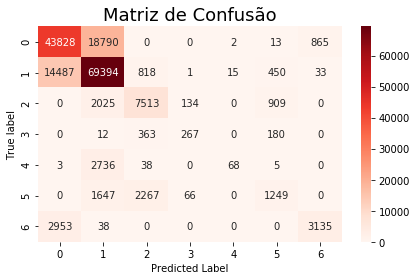

In [11]:
#Imprimir Matriz de Confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [13]:
print('Acurácia: ', accuracy_score(Y_test,predictions))
print('F-Score: ', f1_score(Y_test,predictions, average= 'macro'))
print('Precisão: ', precision_score(Y_test,predictions, average= 'macro'))
print('Revocação: ', recall_score(Y_test,predictions, average= 'macro'))

Acurácia:  0.7197425188176978
F-Score:  0.5084195687078504
Precisão:  0.674938526937111
Revocação:  0.4734380020492974


7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino

In [14]:
#7
score= np.zeros(40)
acuracia = np.zeros(40)

for i in range(10):
    #print('Indo')
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'adam', max_iter= 300, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)
  
    acuracia[i]= accuracy_score(Y_test,predictions)
    score[i]= f1_score(Y_test,predictions, average= 'macro')

In [15]:
print("Média da Acurácia: ",acuracia.mean())
print("Desvio Padrão da Acurácia: ", acuracia.std())
print("Média do F1-Score: ", score.mean())
print("Desvio Padrão do F1-Score: ", score.std())

Média da Acurácia:  0.1797409984854048
Desvio Padrão da Acurácia:  0.31132266321892343
Média do F1-Score:  0.1295600222977213
Desvio Padrão do F1-Score:  0.224617598882218


In [16]:
#Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

score= np.zeros(40)
acuracia = np.zeros(40)

for i in range(10):
    #print('Indo')
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    mlp = MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'sgd', max_iter= 300, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)
  
    acuracia[i]= accuracy_score(Y_test,predictions)
    score[i]= f1_score(Y_test,predictions, average= 'macro')

In [17]:
print("Média da Acurácia: ",acuracia.mean())
print("Desvio Padrão da Acurácia: ", acuracia.std())
print("Média do F1-Score: ", score.mean())
print("Desvio Padrão do F1-Score: ", score.std())

Média da Acurácia:  0.17864133926932255
Desvio Padrão da Acurácia:  0.30942016900658587
Média do F1-Score:  0.11921580590479848
Desvio Padrão do F1-Score:  0.20667685117012302


9. Houve influência da escolha do otimizador no desempenho da rede?

- sim, inclusive no tempo de execução bem superior no SGD... (acrescentar mais aqui)

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [6]:

 conf = [1, 'identity', 'adam', 100, 16, 
       1, 'logistic', 'sgd', 150, 13, 
       1, 'tanh', 'adam', 200, 16, 
       1, 'relu', 'sgd', 100, 17, 
       1, 'identity', 'sgd', 150, 10, 
       2, 'logistic', 'adam', 200, (10, 12), 
       2, 'tanh', 'sgd', 100, (13, 15), 
       2, 'relu', 'adam', 150, (19, 16),
       2, 'identity', 'adam', 200, (11, 13), 
       2, 'relu', 'sgd', 100, (10, 15)]

In [7]:
df_confgs = pd.DataFrame(np.array(conf).reshape(10,5), columns = ["Camadas",
                    'Função de Ativação',
                    'Hiperparametro',
                    'Épocas',
                    'Neurônios'])
            
df_confgs["Épocas"] = pd.to_numeric(df_confgs["Épocas"])
print (df_confgs)

  Camadas Função de Ativação Hiperparametro  Épocas Neurônios
0       1           identity           adam     100        16
1       1           logistic            sgd     150        13
2       1               tanh           adam     200        16
3       1               relu            sgd     100        17
4       1           identity            sgd     150        10
5       2           logistic           adam     200  (10, 12)
6       2               tanh            sgd     100  (13, 15)
7       2               relu           adam     150  (19, 16)
8       2           identity           adam     200  (11, 13)
9       2               relu            sgd     100  (10, 15)


In [8]:
score= np.zeros(10)
acuracia = np.zeros(10)

medias_acuracia = np.zeros(10)
medias_f1score = np.zeros(10)

dp_acuracia = np.zeros(10)
dp_f1score = np.zeros(10)

for i in range(10):
    print("Executando Configuração: ", i+1)
    mlp = MLPClassifier(hidden_layer_sizes= df_confgs['Neurônios'][i], activation= df_confgs['Função de Ativação'][i], solver= df_confgs['Hiperparametro'][i], max_iter= df_confgs['Épocas'][i], verbose= False)

    for j in range(10):
       
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
        X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
       
        mlp.fit(X_train_std, Y_train)
        predictions = mlp.predict(X_test_std)
  
        acuracia[j]= accuracy_score(Y_test,predictions)
        score[j]= f1_score(Y_test,predictions, average= 'macro')

    medias_acuracia[i] = acuracia.mean()
    medias_f1score[i] = score.mean()

    dp_acuracia[i] = acuracia.std()
    dp_f1score[i] = score.std()

Executando Configuração:  1
Executando Configuração:  2
Executando Configuração:  3
Executando Configuração:  4
Executando Configuração:  5
Executando Configuração:  6
Executando Configuração:  7
Executando Configuração:  8
Executando Configuração:  9
Executando Configuração:  10


In [9]:
df_top = df_confgs
df_top['media acuracia'] = medias_acuracia 
df_top['media f1 score'] = medias_f1score

In [10]:
df_top

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
0,1,identity,adam,100,16,0.697669,0.434251
1,1,logistic,sgd,150,13,0.713400,0.417219
2,1,tanh,adam,200,16,0.732727,0.561248
3,1,relu,sgd,100,17,0.722878,0.505038
4,1,identity,sgd,150,10,0.697107,0.421017
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803


In [26]:
df_top.sort_values([ 'media acuracia'], ascending= [False], kind= 'mergesort')

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
2,1,tanh,adam,200,16,0.732727,0.561248
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803
3,1,relu,sgd,100,17,0.722878,0.505038
1,1,logistic,sgd,150,13,0.713400,0.417219
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
0,1,identity,adam,100,16,0.697669,0.434251
4,1,identity,sgd,150,10,0.697107,0.421017


In [15]:
df_top.sort_values(['media f1 score'], ascending= False)

,Camadas,Função de Ativação,Hiperparametro,Épocas,Neurônios,media acuracia,media f1 score
7,2,relu,adam,150,"(19, 16)",0.761886,0.624660
2,1,tanh,adam,200,16,0.732727,0.561248
5,2,logistic,adam,200,"(10, 12)",0.738323,0.553270
6,2,tanh,sgd,100,"(13, 15)",0.739604,0.528853
9,2,relu,sgd,100,"(10, 15)",0.729426,0.528803
3,1,relu,sgd,100,17,0.722878,0.505038
0,1,identity,adam,100,16,0.697669,0.434251
8,2,identity,adam,200,"(11, 13)",0.697758,0.431017
4,1,identity,sgd,150,10,0.697107,0.421017
1,1,logistic,sgd,150,13,0.713400,0.417219


Escolhendo top 3:
- De acordo com a média de acuracia as melhores configurações foram as com indice 7,6 e 5. Já segundo a F1 score foram as 7, 2 e 5. Observando que as configurações 7 e 5 foram as melhores em ambas, consideramos a terceira configuração sendo a 2, pois a acurácia pode ser usada quando a distribuição da classe é semelhante, enquanto a pontuação F1 score é uma métrica melhor quando há classes desbalanceadas, que é o nosso caso.

In [32]:
vetor_top = [7, 2, 5]

In [35]:

def fit(neuronios, func_ativacao, hiperparametro, epocas):

    mlp = MLPClassifier(hidden_layer_sizes=neuronios, activation= func_ativacao, solver= hiperparametro, max_iter=epocas, verbose= False)
    mlp.fit(X_train_std, Y_train)
    predictions = mlp.predict(X_test_std)

    return(predictions)

In [36]:
resultados = []
for i in vetor_top:
    resultados.append(fit(df_confgs['Neurônios'][i], df_confgs['Função de Ativação'][i], df_confgs['Hiperparametro'][i], df_confgs['Épocas'][i]))

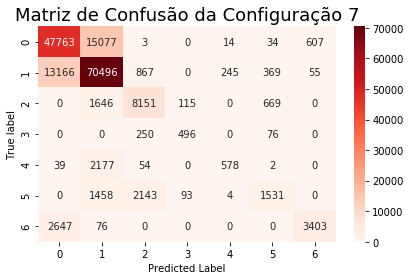

In [37]:

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[0]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 7", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

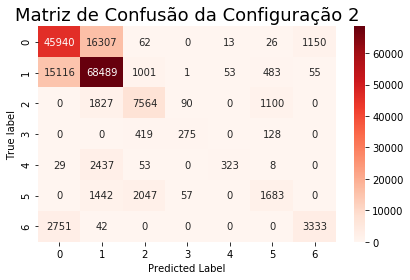

In [39]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[1]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 2", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

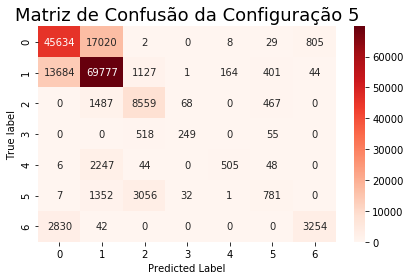

In [40]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, resultados[2]), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão da Configuração 5", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?